In [89]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import missingno as  msno
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing as prepro
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [19]:
estimated = pd.read_csv("SD03Q016/estimated_numbers.csv")
incidence = pd.read_csv("SD03Q016/incidence_per_1000_pop_at_risk.csv")
reported = pd.read_csv("SD03Q016/reported_numbers.csv")

In [20]:
reported.head(10)

,Country,Year,No. of cases,No. of deaths,WHO Region
0,Afghanistan,2017,161778.0,10.0,Eastern Mediterranean
1,Algeria,2017,0.0,0.0,Africa
2,Angola,2017,3874892.0,13967.0,Africa
3,Argentina,2017,0.0,1.0,Americas
4,Armenia,2017,0.0,NaN,Europe
5,Azerbaijan,2017,0.0,NaN,Europe
6,Bangladesh,2017,4893.0,13.0,South-East Asia
7,Belize,2017,7.0,0.0,Americas
8,Benin,2017,1573163.0,2182.0,Africa
9,Bhutan,2017,24.0,1.0,South-East Asia


In [21]:
estimated.head(10)

,Country,Year,No. of cases,No. of deaths,No. of cases_median,No. of cases_min,No. of cases_max,No. of deaths_median,No. of deaths_min,No. of deaths_max,WHO Region
0,Afghanistan,2017,630308[495000-801000],298[110-510],630308,495000.0,801000.0,298,110.0,510.0,Eastern Mediterranean
1,Algeria,2017,0,0,0,NaN,NaN,0,NaN,NaN,Africa
2,Angola,2017,4615605[3106000-6661000],13316[9970-16600],4615605,3106000.0,6661000.0,13316,9970.0,16600.0,Africa
3,Argentina,2017,0,0,0,NaN,NaN,0,NaN,NaN,Americas
4,Armenia,2017,0,0,0,NaN,NaN,0,NaN,NaN,Europe
5,Azerbaijan,2017,0,0,0,NaN,NaN,0,NaN,NaN,Europe
6,Bangladesh,2017,32924[30000-36000],76[3-130],32924,30000.0,36000.0,76,3.0,130.0,South-East Asia
7,Belize,2017,7,0,7,NaN,NaN,0,NaN,NaN,Americas
8,Benin,2017,4111699[2774000-6552000],7328[5740-8920],4111699,2774000.0,6552000.0,7328,5740.0,8920.0,Africa
9,Bhutan,2017,11,0,11,NaN,NaN,0,NaN,NaN,South-East Asia


In [22]:
incidence.head(10)

,Country,Year,No. of cases,WHO Region
0,Afghanistan,2018,29.01,Eastern Mediterranean
1,Algeria,2018,0.00,Africa
2,Angola,2018,228.91,Africa
3,Argentina,2018,0.00,Americas
4,Armenia,2018,0.00,Europe
5,Azerbaijan,2018,0.00,Europe
6,Bangladesh,2018,0.69,South-East Asia
7,Belize,2018,0.01,Americas
8,Benin,2018,386.18,Africa
9,Bhutan,2018,0.01,South-East Asia


In [23]:
reported.isnull().sum()

Country            0
Year               0
No. of cases     234
No. of deaths    269
WHO Region         0
dtype: int64

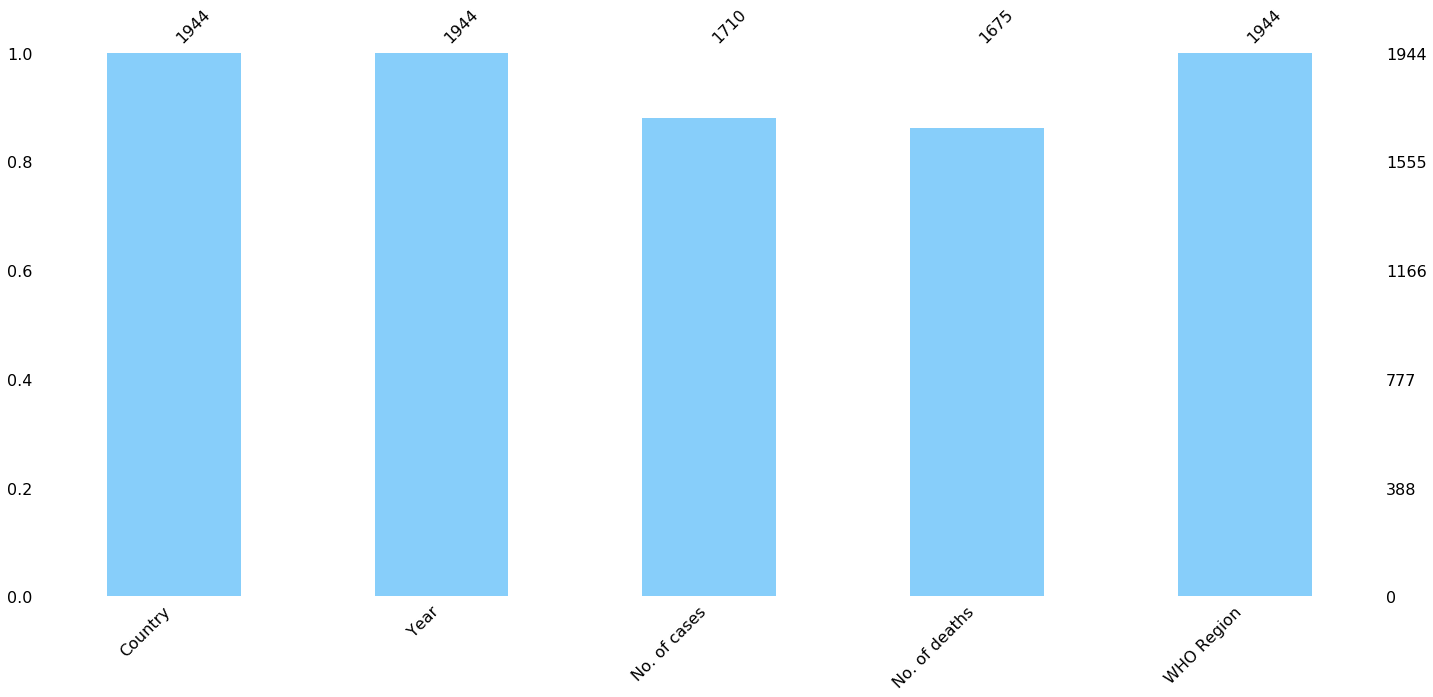

In [46]:
n = msno.bar(reported,color = "lightskyblue")

## So, there is some Null Values,Let's drop those Null Values

In [47]:
reported.dropna(inplace=True)
reported.isnull().sum()

Country          0
Year             0
No. of cases     0
No. of deaths    0
WHO Region       0
dtype: int64

## Let's compare the results with respect to each Country.for that, group the data with respect to Country

In [48]:
reported_group =reported.groupby('Country')["No. of cases","No. of deaths"].sum().reset_index()
reported_group.head()


,Country,No. of cases,No. of deaths
0,Afghanistan,1045271.0,363.0
1,Algeria,1044.0,4.0
2,Angola,26006152.0,125364.0
3,Argentina,2098.0,2.0
4,Armenia,355.0,0.0


In [50]:
reported_cases = reported_group[["Country","No. of cases"]]
reported_cases.head()

,Country,No. of cases
0,Afghanistan,1045271.0
1,Algeria,1044.0
2,Angola,26006152.0
3,Argentina,2098.0
4,Armenia,355.0


## Top 20 country with highest number of Malaria Cases


In [71]:
fig = px.bar(reported_cases.sort_values("No. of cases",ascending=False)[:20][::-1],x="No. of cases",y ="Country",text="No. of cases",)
fig.show()

### Top 20 country with highest number of Death Cases


In [52]:
reported_death = reported_group[["Country","No. of deaths"]]
pio.templates.default ='plotly_dark'
fig = px.bar(reported_death.sort_values("No. of deaths",ascending=False)[:20][::-1],x="No. of deaths",y ="Country",text="No. of deaths",
             title="Top 20 Country with highest number of Malaria Deaths from 2000 to 2018",
             color_discrete_sequence= px.colors.qualitative.Light24,height=800,orientation="h")
fig.show()

### Let's see the cases with respect to WHO Region


In [53]:
who_group =reported.groupby('WHO Region')["No. of cases","No. of deaths"].sum().reset_index()
who_group.head().style.background_gradient(cmap ='Reds')

,WHO Region,No. of cases,No. of deaths
0,Africa,545111852.000000,1480850.000000
1,Americas,13433321.000000,11039.000000
2,Eastern Mediterranean,15841260.000000,26764.000000
3,Europe,112675.000000,25.000000
4,South-East Asia,38305249.000000,49802.000000


### WHO Region with Malaria Cases


In [54]:
pio.templates.default = "plotly_dark"
fig = px.bar(who_group.sort_values("No. of cases",ascending=False)[::-1],y="No. of cases",x ="WHO Region",text="No. of cases",
             title="WHO regions with highest number of Cases from 2000 to 2018",
             color_discrete_sequence= px.colors.qualitative.Set1,height=500,orientation="v")
fig.show()

In [55]:
import plotly.graph_objects as go
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=who_group["WHO Region"],
                             values=who_group['No. of cases'])])
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent',textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(width=800,
    height=600)
fig.show()

### WHO Region with Number of Death Cases


In [58]:

pio.templates.default = "plotly_dark"
fig = px.bar(who_group.sort_values("No. of deaths",ascending=False)[::-1],y="No. of deaths",x ="WHO Region",text="No. of deaths",
             title="WHO region with highest number of Deaths from 2000 to 2018",
             color_discrete_sequence= px.colors.qualitative.Set1,height=500,orientation="v")
fig.show()

In [59]:
import plotly.graph_objects as go
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=who_group["WHO Region"],
                                 values=who_group['No. of deaths'])])
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent',textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(width=800,
    height=600)
fig.show()

### Let's see those cases of Country's with Tree Map


In [60]:
def plot_treemap_cases(dataframe,variable,value):
    fig = px.treemap(dataframe.sort_values(by=value,ascending=False).reset_index(drop=True),
                     path=[variable],values=value,title=("Highest number of Cases from 2000 to 2018 according to" + str(variable) + "<br>"),
                     color_discrete_sequence = px.colors.qualitative.Set1)
    fig.data[0].textinfo = 'label+text+value'
    
    fig.show()
    
def plot_treemap_deaths(dataframe,variable,value):
    fig = px.treemap(dataframe.sort_values(by=value,ascending=False).reset_index(drop=True),
                     path=[variable],values=value,title=("Highest number of Death Cases from 2000 to 2018 according to" + str(variable) + "<br>"),
                     color_discrete_sequence = px.colors.qualitative.Set1)
    fig.data[0].textinfo = 'label+text+value'
    
    fig.show()

In [62]:
plot_treemap_cases(reported_group,"Country","No. of cases")


In [63]:
plot_treemap_deaths(reported_group,"Country","No. of deaths")


### Now let's compare those Values according to different Years


In [64]:
year_group= reported.groupby("Year")[["No. of cases","No. of deaths"]].sum().reset_index()
year_group.head()

,Year,No. of cases,No. of deaths
0,2000,5279182.0,21419.0
1,2001,5534764.0,26162.0
2,2002,5335247.0,70683.0
3,2003,8243454.0,91247.0
4,2004,9389638.0,87926.0


In [65]:
#whole = df_n.groupby('Date')['Date','Confirmed','Deaths','Recovered','Active'].sum().reset_index()
fig = make_subplots(rows=1,cols=2,column_titles = ('No. of cases','No. of deaths'))

trace_1 = go.Scatter(x=year_group['Year'],y=year_group['No. of cases'],name='Cases',opacity=0.9,mode='lines+markers',line_color='blue')

trace_2 = go.Scatter(x=year_group['Year'],y=year_group['No. of deaths'],name='Deaths',opacity=0.9,mode='lines+markers',line_color='red')

fig.append_trace(trace_1,1,1)
fig.append_trace(trace_2,1,2)

fig.update_layout(title_text="Spread of Malaria according to Year")
fig.show()

In [67]:
fig = px.choropleth(reported_group,locationmode="country names",locations ="Country",hover_data = ["Country","No. of cases","No. of deaths"],
                    hover_name = "Country",color="Country",title="Situation of Malaria Over the World"
)
fig.show()

In [72]:
reportedd = reported.groupby(['WHO Region']).agg({'No. of cases' : 'sum'}).reset_index()
x = reported['No. of cases'].sum()
reportedd['Percentage'] = (reportedd['No. of cases']/x)*100
reportedd

,WHO Region,No. of cases,Percentage
0,Africa,545111852.0,87.990261
1,Americas,13433321.0,2.168365
2,Eastern Mediterranean,15841260.0,2.557047
3,Europe,112675.0,0.018188
4,South-East Asia,38305249.0,6.183114
5,Western Pacific,6709491.0,1.083025


## Here we cas see that AFRICA constitutes 88% of the reported data. This means, if we include this, most of our data would be biased, so lets do the analysis in two groups, one includes AFRICA, and one exclides AFRICA

Text(0.5, 1.0, 'In other WHO Regions')

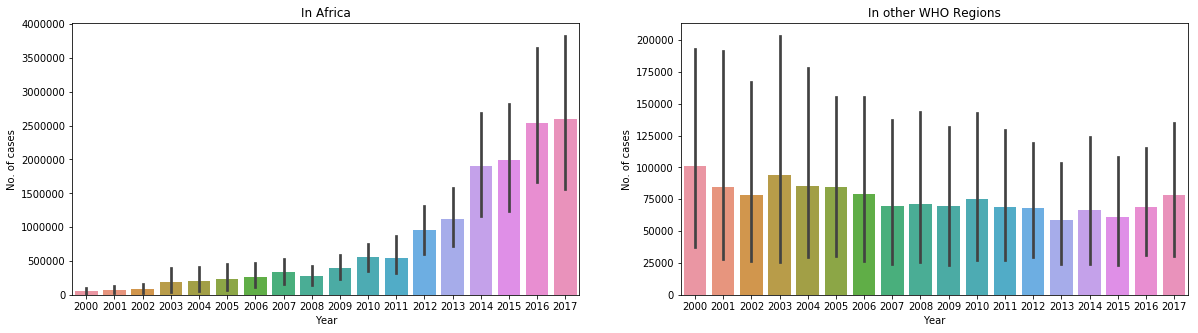

In [73]:
fig_dims = (20, 5)

fig, axes = plt.subplots(1, 2, figsize=fig_dims)
sns.barplot(x = 'Year' , y = 'No. of cases' , data = reported[reported['WHO Region'] == 'Africa'], ax= axes[0]).set_title("In Africa")
sns.barplot(x = 'Year' , y = 'No. of cases' , data = reported[reported['WHO Region'] != 'Africa'], ax= axes[1]).set_title("In other WHO Regions")

## This gives us the trend that, cases are increasing yearly in Africa, whereas, it is declining for the other Regions

In [74]:
estimatedd = estimated.groupby(['WHO Region']).agg({'No. of cases_median' : 'sum'}).reset_index()
x = estimated['No. of cases_median'].sum()
estimatedd['Percentage'] = (estimatedd['No. of cases_median']/x)*100
estimatedd

,WHO Region,No. of cases_median,Percentage
0,Africa,1587152540,89.056616
1,Americas,13025802,0.730890
2,Eastern Mediterranean,34456176,1.933368
3,Europe,262,0.000015
4,South-East Asia,132725734,7.447365
5,Western Pacific,14823234,0.831746


## Again, Africa holds 89% of the estimated data. Plotting two graphs



Text(0.5, 1.0, 'In other WHO Regions')

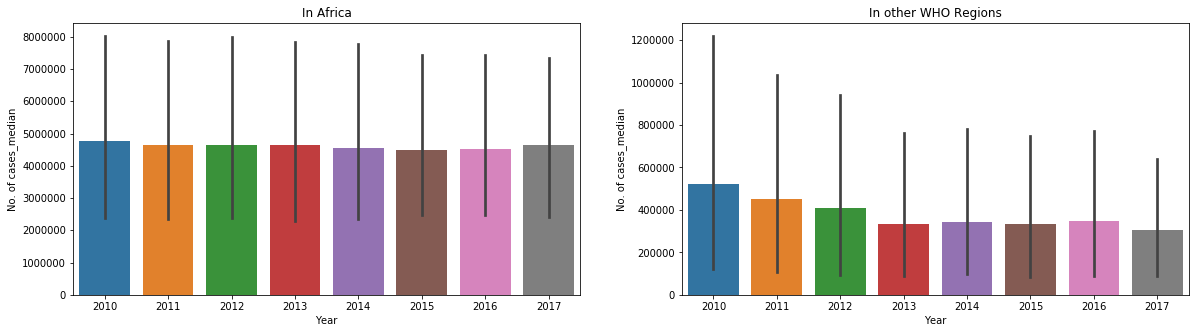

In [75]:
fig_dims = (20, 5)

fig, axes = plt.subplots(1,2 , figsize=fig_dims)
sns.barplot(x = 'Year' , y = 'No. of cases_median' 
            , data = estimated[estimated['WHO Region'] == 'Africa'], ax= axes[0]).set_title("In Africa")
sns.barplot(x = 'Year' , y = 'No. of cases_median' 
            , data = estimated[estimated['WHO Region'] != 'Africa'], ax= axes[1]).set_title("In other WHO Regions")

## incidence

In [76]:
incidenced = incidence.groupby(['WHO Region']).agg({'No. of cases' : 'sum'}).reset_index()
x = incidence['No. of cases'].sum()
incidenced['Percentage'] = (incidenced['No. of cases']/x)*100
incidenced

,WHO Region,No. of cases,Percentage
0,Africa,192303.47,86.632035
1,Americas,9666.15,4.354566
2,Eastern Mediterranean,4196.10,1.890328
3,Europe,107.84,0.048582
4,South-East Asia,2824.23,1.272306
5,Western Pacific,12879.53,5.802183


## Africa holds 87% data



Text(0.5, 1.0, 'In other WHO Regions')

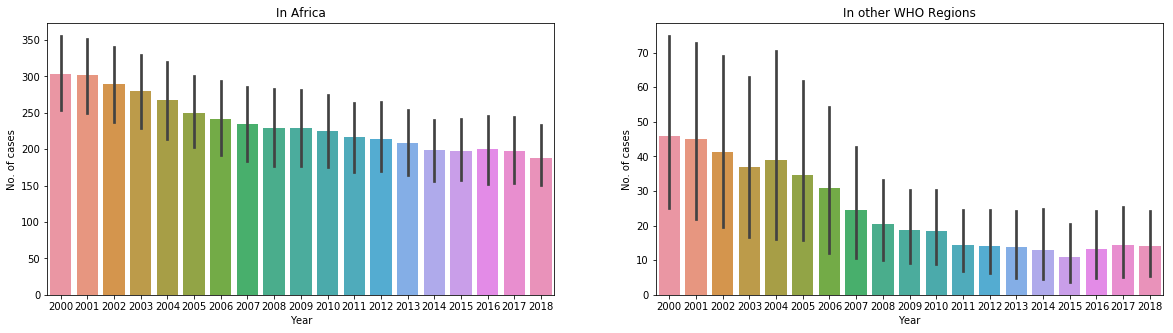

In [77]:
fig_dims = (20, 5)

fig, axes = plt.subplots(1,2 , figsize=fig_dims)
sns.barplot(x = 'Year' , y = 'No. of cases' 
            , data = incidence[incidence['WHO Region'] == 'Africa'], ax= axes[0]).set_title("In Africa")
sns.barplot(x = 'Year' , y = 'No. of cases' 
            , data = incidence[incidence['WHO Region'] != 'Africa'], ax= axes[1]).set_title("In other WHO Regions")

## Observing the graph, the trends show that the numbers are declining for both. Its small yearly decrease for Africa region, whereas, for other regions, it's a good yearly decrease.



### Feature engineering
Get dummies has been applied to the 'Country' feature of the reported data, thereby one hot encoding it.

In [79]:
reported = pd.concat([reported, pd.get_dummies(reported['Country'])], axis=1)

## We use a Label Encoder to convert the 'Country' and 'WHO Region' features from categorical to numerical

In [82]:
cols = ['Country', 'WHO Region']
for col in cols:
    le = LabelEncoder()
    letest = LabelEncoder()
    reported[col] = le.fit_transform(reported[col])

## Now, an incidence feature is added to the reported data, followed by binning the cases and incidence features.¶


In [83]:
reported['Incidence'] = (incidence['No. of cases'][107:]).reset_index(drop=True)
reported['Cases bin'] = pd.cut(reported['No. of cases'], bins=[0, 100, 1000, 10000, 100000, 1000000, 16000000], labels=[0, 1, 2, 3, 4, 5]).fillna(0)
reported['Incidence bin'] = pd.cut(reported['Incidence'], bins=[0, 0.3, 5, 45, 250, 800], labels=[0, 1, 2, 3, 4]).fillna(0)
reported = reported.fillna(0)

## Next, log transform and box cox features have been added to the reported dataframe.¶


In [84]:
reported['Log no. of cases'] = (reported['No. of cases']+1).transform(np.log)
reported['Box Cox no. of cases'] = stats.boxcox(reported['No. of cases']+1)[0]

reported['Log WHO Region'] = (reported['WHO Region']+1).transform(np.log)
reported['Box Cox WHO Region'] = stats.boxcox(reported['WHO Region']+1)[0]

reported['Log Incidence'] = (reported['Incidence']+1).transform(np.log)
reported['Box Cox Incidence'] = stats.boxcox(reported['Incidence']+1)[0]

## We also add a minmax, standardized and normalized set of variables.¶


In [85]:
reported['Cases minmax'] = prepro.minmax_scale(reported[['No. of cases']])
reported['Cases standardized'] = prepro.StandardScaler().fit_transform(reported[['No. of cases']])
reported['Cases l2'] = prepro.normalize(reported[['No. of cases']])

reported['Incidence minmax'] = prepro.minmax_scale(reported[['Incidence']])
reported['Incidence standardized'] = prepro.StandardScaler().fit_transform(reported[['Incidence']])
reported['Incidence l2'] = prepro.normalize(reported[['Incidence']])

In [86]:
y = reported['No. of deaths']
X = reported.drop('No. of deaths', axis=1).reset_index(drop=True)

# Observing all the graphs, the following conclusions can be drawn

For all the regions, except Afirca, the cases are declining yearly.
Africa shows a steady decrease, but not a huge decrease